##QED-CIS in the canonical RHF basis
The polaritonic energy eigenfunctions for state $I$ in the
CQED-CIS ansatz can be written as 
\begin{equation}
\Psi_I = c_0^0 |\Phi_0\rangle |0\rangle + 
c_0^1 |\Phi_0\rangle |1\rangle +
\sum_{i,a} c_{ia}^0 |\Phi_i^a\rangle |0\rangle +
\sum_{i,a} c_{ia}^1 |\Phi_i^a\rangle |1\rangle. 
\end{equation}
We can build and diagonalize a Hamiltonian matrix in this basis to 
determine the CIS energies and wavefunctions.  In so doing, we arrive at the following classes of matrix elements (where all dipole, quadrupole, and other 1- and 2-electron integrals are now transformed to the Canonincal RHF basis):
\begin{align}
    \langle s | \langle \Phi_0 | \hat{H} | \Phi_0 \rangle | t \rangle &= 
    E_{RHF} + \sqrt{t} \left(\omega - i \frac{\gamma}{2} \right)\delta_{st} \\
    &+ \delta_{st}  \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ii}\mu^{\xi}_{jj} \\
    &- \frac{1}{2}\delta_{st} \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij}\mu^{\xi}_{ji} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \sum_i^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ii} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii} \\
    &+ \delta_{st} d_c \\
    &+\sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle ( \delta_{s,t+1} + \delta_{s+1,t} ) \\
    &-\sqrt{\frac{\omega}{2}} \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii}( \delta_{s,t+1} + \delta_{s+1,t} )
\end{align}
for terms involving the Hartree-Fock reference states and arbitrary photon states,
\begin{align}
    \langle s \langle \Phi_0 | \hat{H} | \Phi_i^a \rangle | t \rangle &=
    \delta_{st} \sum_{\xi,\xi'}\sum_{j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu_{ia}^{\xi} \mu_{jj}^{\xi'} \\
    &-\delta_{st} \frac{1}{2}\sum_{\xi,\xi'}\sum_{j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu_{ij}^{\xi} \mu_{ja}^{\xi'} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q_{ia}^{\xi} \\
    &+ \delta_{st} \left( \lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu_{ia}^{\xi} \\
    &- \sqrt{\frac{\omega}{2}} \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ia}(\delta_{s,t+1} + \delta_{s+1,t}),
\end{align}
for elements between the Hartree-Fock reference and singly-excited determinants and arbitrary photon states, and
\begin{align}
    \langle s \langle \Phi_i^a | \hat{H} | \Phi_j^b \rangle | t \rangle &=   \left(\epsilon_a - \epsilon_i \right)\delta_{ij} \delta_{ab} \delta_{st} \\
    &+ \delta_{st} \left( 2(ia|jb) - (ij|ab) \right) \\
    &+ \delta_{st} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ia} \mu^{\xi}_{jb} \\
    &- \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij} \mu^{\xi}_{ab} \\
    &+ \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ab} \delta_{ij} \\
    &- \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ij} \delta_{ab} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ab} \delta_{ij} \\
    &-\delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ij} \delta_{ab} \\
    &+ \delta_{st} \delta_{ij} \delta_{ab} d_c \\
    &+ \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \delta_{ij} \delta_{ab} \sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle \\
    &- \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \sqrt{\frac{\omega}{2}} \sum_{xi} \lambda^{\xi} \mu^{\xi}_{ab} \delta_{ij} \\
    &+ \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \sqrt{\frac{\omega}{2}} \sum_{xi} \lambda^{\xi} \mu^{\xi}_{ij} \delta_{ab}
\end{align}

In [49]:
from __future__ import print_function

"""
A reference implementation of cavity quantum electrodynamics 
configuration interactions singles.
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
import scipy.linalg as la
import time

# ==> Set Basic Psi4 Options <==

# Memory specifications
psi4.set_memory(int(2e9))
numpy_memory = 2

# Output options
psi4.core.set_output_file('output.dat', False)

#mol = psi4.geometry("""
#0 1
#O
#H 1 1.1
#H 1 1.1 2 104
#symmetry c1
#""")

mol = psi4.geometry("""
0 1
H 
H 1 1.0
symmetry c1
""")

psi4.set_options({'basis':        'sto-3g',
                  'scf_type':     'pk',
                  'reference':    'rhf',
                  'mp2_type':     'conv',
                  'save_jk': True,
                  'e_convergence': 1e-8,
                  'd_convergence': 1e-8})



def compute_cis(mol_dict, lam_vec, omega_val):
    # Get the SCF wavefunction & energies
    scf_e, wfn = psi4.energy('scf', return_wfn=True)
    
    # ==> Nuclear Repulsion Energy <==
    E_nuc = mol.nuclear_repulsion_energy()
    nmo = wfn.nmo()

    # Create instance of MintsHelper class
    mints = psi4.core.MintsHelper(wfn.basisset())
    
    # Grab data from wavfunction
    
    # number of doubly occupied orbitals
    ndocc   = wfn.nalpha()
    
    # total number of orbitals
    nmo     = wfn.nmo()
    
    # number of virtual orbitals
    nvirt   = nmo - ndocc
    
    # grab all transformation vectors and store to a numpy array!
    C = np.asarray(wfn.Ca())
    
    # occupied orbitals:
    Co = wfn.Ca_subset("AO", "OCC")
    
    # virtual orbitals:
    Cv = wfn.Ca_subset("AO", "VIR")
    
    # grab all transformation vectors and store to a numpy array!
    C = np.asarray(wfn.Ca())
    
    # orbital energies
    eps     = np.asarray(wfn.epsilon_a())
    
    # ==> Nuclear Repulsion Energy <==
    E_nuc = mol.nuclear_repulsion_energy()
    
    print("\nNumber of occupied orbitals: %d" % ndocc)
    
    # 2 electron integrals in ao basis
    #I = np.asarray(mints.ao_eri())

    # 2 electron integrals in mo basis
    ovov = np.asarray(mints.mo_eri(Co, Cv, Co, Cv))
    
    # build the (oo|vv) integrals:
    oovv = np.asarray(mints.mo_eri(Co, Co, Cv, Cv))
    
    # Extra terms for Pauli-Fierz Hamiltonian
    # nuclear dipole
    mu_nuc_x = mol.nuclear_dipole()[0]
    mu_nuc_y = mol.nuclear_dipole()[1]
    mu_nuc_z = mol.nuclear_dipole()[2]
    
    # dipole arrays in AO basis
    mu_ao_x = np.asarray(mints.ao_dipole()[0])
    mu_ao_y = np.asarray(mints.ao_dipole()[1])
    mu_ao_z = np.asarray(mints.ao_dipole()[2])
    
    # transform dipole array to canonical MO basis from ordinary RHF (no photon)
    mu_cmo_x = np.dot(C.T, mu_ao_x).dot(C)
    mu_cmo_y = np.dot(C.T, mu_ao_y).dot(C)
    mu_cmo_z = np.dot(C.T, mu_ao_z).dot(C)
    
    # compute components of electronic dipole moment <mu> from ordinary RHF (no photon)
    mu_exp_x = 0.0
    mu_exp_y = 0.0
    mu_exp_z = 0.0
    
    for i in range(0, ndocc):
        # double because this is only alpha terms!
        mu_exp_x += 2 * mu_cmo_x[i, i]
        mu_exp_y += 2 * mu_cmo_y[i, i]
        mu_exp_z += 2 * mu_cmo_z[i, i]
        
    # need to add the nuclear term to the expectation values above whic
    # only included the electronic term!
    mu_exp_x += mu_nuc_x
    mu_exp_y += mu_nuc_y
    mu_exp_z += mu_nuc_z
        
    # We need to carry around the electric field dotted into the nuclear dipole moment
    # and the electric field dotted into the RHF electronic dipole expectation value...
    # so let's compute them here!
    
    # \lambda \cdot \mu_{nuc}
    l_dot_mu_nuc = lam[0] * mu_nuc_x + lam[1] * mu_nuc_y + lam[2] * mu_nuc_z
    # \lambda \cdot < \mu > where <\mu> contains electronic and nuclear contributions
    l_dot_mu_exp = lam[0] * mu_exp_x + lam[1] * mu_exp_y + lam[2] * mu_exp_z
    
    # dipole constants to add to E_RHF
    #  0.5 * (\lambda \cdot \mu_{nuc})** 2 
    #      - (\lambda \cdot <\mu> ) ( \lambda \cdot \mu_{nuc})
    # +0.5 * (\lambda \cdot <\mu>) ** 2
    d_c = 0.5 * l_dot_mu_nuc **2 - l_dot_mu_nuc * l_dot_mu_exp + 0.5 * l_dot_mu_exp ** 2
    
    # quadrupole arrays
    # Q_ao_xx[0,0] would correspond to the integral
    # of \phi_1 * e^2 * x * x * \phi_1 
    # where e is the charge of the electron, x is the
    # x-corrdinate, phi_1 is atomic orbital 1
    
    # Q_ao_xy[0,0] would correspond to the integral
    # of \phi_1 * e^2 * x * y * \phi_1
    Q_ao_xx = np.asarray(mints.ao_quadrupole()[0])
    Q_ao_xy = np.asarray(mints.ao_quadrupole()[1])
    Q_ao_xz = np.asarray(mints.ao_quadrupole()[2])
    Q_ao_yy = np.asarray(mints.ao_quadrupole()[3])
    Q_ao_yz = np.asarray(mints.ao_quadrupole()[4])
    Q_ao_zz = np.asarray(mints.ao_quadrupole()[5])
    
    # transform quadrupole array to canonical MO basis from ordinary RHF (no photon)
    Q_cmo_xx = np.dot(C.T, Q_ao_xx).dot(C)
    Q_cmo_xy = np.dot(C.T, Q_ao_xy).dot(C)
    Q_cmo_xz = np.dot(C.T, Q_ao_xz).dot(C)
    Q_cmo_yy = np.dot(C.T, Q_ao_yy).dot(C)
    Q_cmo_yz = np.dot(C.T, Q_ao_yz).dot(C)
    Q_cmo_zz = np.dot(C.T, Q_ao_zz).dot(C)
    
    # build the (ov|ov) integrals:
    ovov = np.asarray(mints.mo_eri(Co, Cv, Co, Cv))
    
    # build the (oo|vv) integrals:
    oovv = np.asarray(mints.mo_eri(Co, Co, Cv, Cv))
    # strip out occupied orbital energies, eps_o spans 0..ndocc-1
    eps_o = eps[:ndocc]
    
    # strip out virtual orbital energies, eps_v spans 0..nvirt-1
    eps_v = eps[ndocc:]

    # create Hamiltonian
    HCIS = np.zeros((2 + ndocc * nvirt * 2, 2 + ndocc * nvirt * 2))
    
    # (\lambda \cdot \mu_nuc - \lambda \cdot <\mu>) term
    dc_offset = l_dot_mu_nuc - l_dot_mu_exp
    
    # elements corresponding to <s|<\Phi_0 | H | \Phi_0>|t> go here
    # <0|\Phi_0| H |\Phi_0>0>
    
    # constant terms in the diagonals
    H_00 = scf_e + d_c 
    
    
    # add 1-electron contributions to diagonals
    for i in range(0,ndocc):
        # dipole terms scaled by dc_offset term
        H_00 += dc_offset * lam[0] * mu_cmo_x[i,i]       
        H_00 += dc_offset * lam[1] * mu_cmo_y[i,i]         
        H_00 += dc_offset * lam[2] * mu_cmo_z[i,i]
        
        # quadrupole terms
        H_00 += 0.5 * lam[0] * lam[0] * Q_cmo_xx[i,i]     
        H_00 += 0.5 * lam[1] * lam[1] * Q_cmo_yy[i,i]  
        H_00 += 0.5 * lam[2] * lam[2] * Q_cmo_zz[i,i] 
        H_00 += lam[0] * lam[1] * Q_cmo_xy[i,i]
        H_00 += lam[0] * lam[2] * Q_cmo_xz[i,i]
        H_00 += lam[1] * lam[2] * Q_cmo_yz[i,i]
        
    # add 2-electron contributions to diagonals
    for i in range(0,ndocc):
        for j in range(i+1, ndocc):
            # diagonal terms (xx, yy, zz)
            # xx
            H_00 += lam[0] * lam[0] * mu_cmo_x[i,i] * mu_cmo_x[j,j]
            H_00 -= 0.5 * lam[0] * lam[0] * mu_cmo_x[i,j] * mu_cmo_x[j,i]
            
            # yy
            H_00 += lam[1] * lam[1] * mu_cmo_y[i,i] * mu_cmo_y[j,j]
            H_00 -= 0.5 * lam[1] * lam[1] * mu_cmo_y[i,j] * mu_cmo_y[j,i]
            
            # zz
            H_00 += lam[2] * lam[2] * mu_cmo_z[i,i] * mu_cmo_z[j,j]
            H_00 -= 0.5 * lam[2] * lam[2] * mu_cmo_z[i,j] * mu_cmo_z[j,i]

            # off-diagonal terms (xy, xz, yz)
            # xy 
            H_00 += lam[0] * lam[1] * mu_cmo_x[i,i] * mu_cmo_y[j,j]
            H_00 -= 0.5 * lam[0] * lam[1] * mu_cmo_x[i,j] * mu_cmo_y[j,i]

            # yx
            H_00 += lam[1] * lam[0] * mu_cmo_y[i,i] * mu_cmo_x[j,j]
            H_00 -= 0.5 * lam[1] * lam[0] * mu_cmo_y[i,j] * mu_cmo_x[j,i]
            
            # xz
            H_00 += lam[0] * lam[2] * mu_cmo_x[i,i] * mu_cmo_z[j,j]
            H_00 -= 0.5 * lam[0] * lam[2] * mu_cmo_x[i,j] * mu_cmo_z[j,i]

            # zx
            H_00 += lam[2] * lam[0] * mu_cmo_z[i,i] * mu_cmo_x[j,j]
            H_00 -= 0.5 * lam[2] * lam[0] * mu_cmo_z[i,j] * mu_cmo_x[j,i]
            
            # yz
            H_00 += lam[1] * lam[2] * mu_cmo_y[i,i] * mu_cmo_z[j,j]
            H_00 -= 0.5 * lam[1] * lam[2] * mu_cmo_y[i,j] * mu_cmo_z[j,i]

            # zy
            H_00 += lam[2] * lam[1] * mu_cmo_z[i,i] * mu_cmo_y[j,j]
            H_00 -= 0.5 * lam[2] * lam[1] * mu_cmo_z[i,j] * mu_cmo_y[j,i]
        
    H_11 = H_00 + omega_val
    HCIS[0,0] = H_00
    HCIS[1,1] = H_11
    
    H_10 = l_dot_mu_exp
    # now sum over occupied orbitals
    for i in range (0, ndocc):
        H_10 -= lam[0] * mu_cmo_x[i,i]
        H_10 -= lam[1] * mu_cmo_y[i,i]
        H_10 -= lam[1] * mu_cmo_z[i,i]
        
    H_10 *= np.sqrt(omega_val / 2)
    
    ### off-diagonals for this block are the same!
    HCIS[0,1] = H_10
    HCIS[1,0] = H_10
    
    
    # elements corresponding to <s|<\Phi_i^a| H | \Phi_0|t> and <s|<\Phi_0| H | \Phi_i^a|t> go here!
    for i in range(0, ndocc):
        for a in range(0, nvirt):
            for s in range(0,2):
                # offset by 2 to account for the <s|<\Phi_0| H|\Phi_0>|t> block
                ias = 2*(i*nvirt + a) + s + 2
                
                
                for t in range(0,2):
                    Hterm = 0.
                    if s==t:
                        # quadrupole terms 
                        # xx
                        Hterm +=  0.5 * lam[0] * lam[0] * Q_cmo_xx[i,a]
                        # yy
                        Hterm += 0.5 * lam[1] * lam[1] * Q_cmo_yy[i,a]
                        # zz
                        Hterm += 0.5 * lam[2] * lam[2] * Q_cmo_zz[i,a]
                        # xy
                        Hterm += lam[0] * lam[1] * Q_cmo_xy[i,a]
                        # xz 
                        Hterm += lam[0] * lam[2] * Q_cmo_xz[i,a]
                        # yz 
                        Hterm += lam[1] * lam[2] * Q_cmo_yz[i,a]
                        
                        # 1e dipole terms scaled by dipole-offset 
                        # x
                        Hterm += dc_offset * lam[0] * mu_cmo_x[i,a]
                        # y
                        Hterm += dc_offset * lam[1] * mu_cmo_y[i,a]
                        # z
                        Hterm += dc_offset * lam[2] * mu_cmo_z[i,a]
                        
                        # 2e dipole terms
                        for j in range(0, ndocc):
                            # xx 
                            Hterm += lam[0] * lam[0] * mu_cmo_x[i,a] * mu_cmo_x[j,j]
                            Hterm -= 0.5 * lam[0] * lam[0] * mu_cmo_x[i,j] * mu_cmo_x[j,a]
                            
                            # yy
                            Hterm += lam[1] * lam[1] * mu_cmo_y[i,a] * mu_cmo_y[j,j]
                            Hterm -= 0.5 * lam[1] * lam[1] * mu_cmo_y[i,j] * mu_cmo_y[j,a]
                            
                            # zz
                            Hterm += lam[2] * lam[2] * mu_cmo_z[i,a] * mu_cmo_z[j,j]
                            Hterm -= 0.5 * lam[2] * lam[2] * mu_cmo_z[i,j] * mu_cmo_y[j,a]

                            # xy
                            Hterm += lam[0] * lam[1] * mu_cmo_x[i,a] * mu_cmo_y[j,j]
                            Hterm -= 0.5 * lam[0] * lam[1] * mu_cmo_x[i,j] * mu_cmo_y[j,a]
                            
                            # yx
                            Hterm += lam[1] * lam[0] * mu_cmo_y[i,a] * mu_cmo_x[j,j]
                            Hterm -= 0.5 * lam[1] * lam[0] * mu_cmo_y[i,j] * mu_cmo_x[j,a]
                            
                            # xz
                            Hterm += lam[0] * lam[2] * mu_cmo_x[i,a] * mu_cmo_z[j,j]
                            Hterm -= 0.5 * lam[0] * lam[0] * mu_cmo_z[i,j] * mu_cmo_z[j,a]
                            
                            # zx
                            Hterm += lam[2] * lam[0] * mu_cmo_z[i,a] * mu_cmo_x[j,j]
                            Hterm -= 0.5 * lam[2] * lam[0] * mu_cmo_z[i,j] * mu_cmo_x[j,a]
                            
                            # yz
                            Hterm += lam[1] * lam[2] * mu_cmo_y[i,a] * mu_cmo_z[j,j]
                            Hterm -= 0.5 * lam[1] * lam[2] * mu_cmo_y[i,j] * mu_cmo_z[j,a]
                            
                            # zy
                            Hterm += lam[2] * lam[1] * mu_cmo_z[i,a] * mu_cmo_y[j,j]
                            Hterm -= 0.5 * lam[2] * lam[1] * mu_cmo_z[i,j] * mu_cmo_y[j,a]

                    else:
                        Hterm = lam[0] * mu_cmo_x[i,a]
                        Hterm += lam[1] * mu_cmo_y[i,a]
                        Hterm += lam[2] * mu_cmo_z[i,a]
                        Hterm *= np.sqrt(omega_val/2)
                HCIS[ias,t] = Hterm
                HCIS[t,ias] = Hterm
          
                
    # elements corresponding to <s|<\Phi_i^a| H | \Phi_j^b|t>
    for i in range(0, ndocc):
        for a in range(0, nvirt):
            for s in range(0,2):
                ias = 2*(i*nvirt + a) + s + 2
                
                for j in range(0, ndocc):
                    for b in range(0, nvirt):
                        for t in range(0,2):
                            jbt = 2*(j*nvirt + b) + t + 2
                            Hterm = 0.

                            # most restrictive constraint
                            if s==t and i==j and a==b:
                                Hterm +=  d_c + eps_v[a] - eps_o[i]

                            if s==t and i==j:
                                # quadrupole terms
                                # xx
                                Hterm += 0.5 * lam[0] * lam[0] * Q_cmo_xx[a,b]
                                # yy
                                Hterm += 0.5 * lam[1] * lam[1] * Q_cmo_yy[a,b]
                                # zz
                                Hterm += 0.5 * lam[2] * lam[2] * Q_cmo_zz[a,b]
                                # xy
                                Hterm += lam[0] * lam[1] * Q_cmo_xy[a,b]
                                # xz
                                Hterm += lam[0] * lam[2] * Q_cmo_xz[a,b]
                                # yz
                                Hterm += lam[1] * lam[2] * Q_cmo_xz[a,b]

                                # scaled dipole terms
                                # x
                                Hterm += dc_offset * lam[0] * mu_cmo_x[a,b]
                                # y
                                Hterm += dc_offset * lam[1] * mu_cmo_y[a,b]
                                # z 
                                Hterm += dc_offset * lam[2] * mu_cmo_z[a,b]

                            if s==t and a==b:
                                # quadrupole terms
                                # xx
                                Hterm -= 0.5 * lam[0] * lam[0] * Q_cmo_xx[i,j]
                                # yy
                                Hterm -= 0.5 * lam[1] * lam[1] * Q_cmo_yy[i,j]
                                # zz
                                Hterm -= 0.5 * lam[2] * lam[2] * Q_cmo_zz[i,j]
                                # xy
                                Hterm -= lam[0] * lam[1] * Q_cmo_xy[i,j]
                                # xz
                                Hterm -= lam[0] * lam[2] * Q_cmo_xz[i,j]
                                # yz
                                Hterm -= lam[1] * lam[2] * Q_cmo_xz[i,j]

                                # scaled dipole terms
                                # x
                                Hterm -= dc_offset * lam[0] * mu_cmo_x[i,j]
                                # y
                                Hterm -= dc_offset * lam[1] * mu_cmo_y[i,j]
                                # z 
                                Hterm -= dc_offset * lam[2] * mu_cmo_z[i,j]


                            if s==t:
                                # 2-e dipole terms
                                # xx
                                Hterm += lam[0] * lam[0] * mu_cmo_x[i,a] * mu_cmo_x[j,b]
                                Hterm -= 0.5 * lam[0] * lam[0] * mu_cmo_x[i,j] * mu_cmo_x[a,b]

                                # yy
                                Hterm += lam[1] * lam[1] * mu_cmo_y[i,a] * mu_cmo_y[j,b]
                                Hterm -= 0.5 * lam[1] * lam[1] * mu_cmo_y[i,j] * mu_cmo_y[a,b]
                                # zz
                                Hterm += lam[2] * lam[2] * mu_cmo_z[i,a] * mu_cmo_z[j,b]
                                Hterm -= 0.5 * lam[2] * lam[2] * mu_cmo_z[i,j] * mu_cmo_z[a,b]
                                
                                # xy
                                Hterm += lam[0] * lam[1] * mu_cmo_x[i,a] * mu_cmo_y[j,b]
                                Hterm -= 0.5 * lam[0] * lam[1] * mu_cmo_x[i,j] * mu_cmo_y[a,b]

                                # yx
                                Hterm += lam[1] * lam[0] * mu_cmo_y[i,a] * mu_cmo_x[j,b]
                                Hterm -= 0.5 * lam[1] * lam[0] * mu_cmo_y[i,j] * mu_cmo_x[a,b]

                                # xz
                                Hterm += lam[0] * lam[2] * mu_cmo_x[i,a] * mu_cmo_z[j,b]
                                Hterm -= 0.5 * lam[0] * lam[2] * mu_cmo_x[i,j] * mu_cmo_z[a,b]

                                # zx
                                Hterm += lam[2] * lam[0] * mu_cmo_z[i,a] * mu_cmo_x[j,b]
                                Hterm -= 0.5 * lam[2] * lam[0] * mu_cmo_z[i,j] * mu_cmo_x[a,b]

                                # yz
                                Hterm += lam[1] * lam[2] * mu_cmo_y[i,a] * mu_cmo_z[j,b]
                                Hterm -= 0.5 * lam[1] * lam[2] * mu_cmo_y[i,j] * mu_cmo_z[a,b]

                                # zy
                                Hterm += lam[2] * lam[1] * mu_cmo_z[i,a] * mu_cmo_y[j,b]
                                Hterm -= 0.5 * lam[2] * lam[1] * mu_cmo_z[i,j] * mu_cmo_y[a,b]

                                # 2e integral terms
                                Hterm += 2 * ovov[i, a, j, b] - oovv[i,j,a,b]

                            if (s==t+1 or s+1==t) and i==j and a==b:
                                # constant l dot mu term
                                Hterm += np.sqrt(omega_val/2) * l_dot_mu_exp
                            if (s==t+1 or s+1==t) and a==b:
                                # dipole coupling terms
                                # x
                                Hterm += np.sqrt(omega_val/2) * lam[0] * mu_cmo_x[i,j]
                                # y
                                Hterm += np.sqrt(omega_val/2) * lam[1] * mu_cmo_y[i,j]
                                # z
                                Hterm += np.sqrt(omega_val/2) * lam[2] * mu_cmo_z[i,j]
                            if (s==t+1 or s+1==t) and i==j:
                                # dipole coupling terms
                                # x
                                Hterm -= np.sqrt(omega_val/2) * lam[0] * mu_cmo_x[a,b]
                                # y
                                Hterm -= np.sqrt(omega_val/2) * lam[1] * mu_cmo_y[a,b]
                                # z
                                Hterm -= np.sqrt(omega_val/2) * lam[2] * mu_cmo_z[a,b]

                            HCIS[ias,jbt] = Hterm
    print("now formed")                        
    print(HCIS)
    # now diagonalize H
    # use eigh if Hermitian
    if np.isclose(np.imag(om),0,1e-6):
        ECIS, CCIS = np.linalg.eigh(HCIS)
    # use eig if not-Hermitian... note will not
    # return both the left and right eigenvectos
    # but the equivalent scipy routine will...
    # need to do a bit more searching to figure out 
    # what we want to do with L and R vecs!
    else:
        ECIS, CCIS = np.linalg.eig(HCIS)

    # just return the energies for now!
    return ECIS

In [82]:
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
# electric field
Ex = 0
Ey = 0
Ez = 0
lam = np.array([Ex, Ey, Ez])

om = 0/27.211
mol = psi4.geometry("""
1 1
Mg
H 1 1.3
symmetry c1
""")

e, wfn = psi4.energy("scf/sto-3g", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
res = tdscf_excitations(wfn, states=n_states, tda=True, triplets = "NONE")
#rpa = tdscf_excitations(wfn, states=4, tda=True)
    
delta_e = [r["EXCITATION ENERGY"] for r in res]

    
vals = compute_cis(mol, lam, om)

print("psi4")
print(e, delta_e[0] + e, delta_e[1]+e)

print("me")
print(vals+e)


Number of occupied orbitals: 6
now formed
[[-1.97490110e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.97490110e+02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.82907521e+01 ...  0.00000000e+00
   6.39389968e-03  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.99864127e-01
   0.00000000e+00  2.73478187e-16]
 [ 0.00000000e+00  0.00000000e+00  6.39389968e-03 ...  0.00000000e+00
   9.46939326e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.73478187e-16
   0.00000000e+00  9.46939326e-01]]
psi4
-197.4901098279259 -197.1451665959501 -196.99074172133513
me
[-394.98021966 -394.98021966 -197.1451666  -197.1451666  -196.99074172
 -196.99074172 -196.99074172 -196.99074172 -196.54387858 -196.54387858
 -195.59491162 -195.59491162 -195.59491162 -195.59491162 -195.57005717
 -195.57005717 -195.41296609 -195.41296609

In [77]:


vals = compute_cis(mol, lam, om)
print(vals)

n_states = 2

# set the number of bond lengths to compute the stretch along
n_geoms = 15

# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Psi4_g = []
Psi4_e = []
Our_g = []
Our_e = []


# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.3 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate the MgH+ molecule using a z-matrix and set the Mg-H+ bond length
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })  
   
    # calculate and save the ground-state energy and wavefunction
    e, wfn = psi4.energy("scf/sto-3g", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
    res = tdscf_excitations(wfn, tdscf_tda=True, states=n_states, triplets = "NONE")
    
    # parse the excitation energies from the 'res' dictionary
    delta_e = [r["EXCITATION ENERGY"] for r in res]
    #print("delta E is",delta_e)
    
    # parse the transition dipole moment from the 'res' dictionary
    #mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Psi4_g.append(e)
    Psi4_e.append(e+delta_e[0])
    
    vals = compute_cis(mol, lam, om)

    Our_g.append(vals[0])
    Our_e.append(vals[0]+vals[2])
    # increment the counter!
    ctr += 1
    


Number of occupied orbitals: 6
now formed
[[-1.97490110e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.97490110e+02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.82907521e+01 ...  0.00000000e+00
   6.39389968e-03  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.99864127e-01
   0.00000000e+00 -8.79425813e-17]
 [ 0.00000000e+00  0.00000000e+00  6.39389968e-03 ...  0.00000000e+00
   9.46939326e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.79425813e-17
   0.00000000e+00  9.46939326e-01]]
[-197.49010983 -197.49010983    0.34494323    0.34494323    0.49936811
    0.49936811    0.49936811    0.49936811    0.94623125    0.94623125
    1.89519821    1.89519821    1.89519821    1.89519821    1.92005266
    1.92005266    2.07714373    2.07714373    2.07788519    2.07788519
    2.07788519    2.07788519    2.081

TypeError: tdscf_excitations() got an unexpected keyword argument 'tdscf_tda'

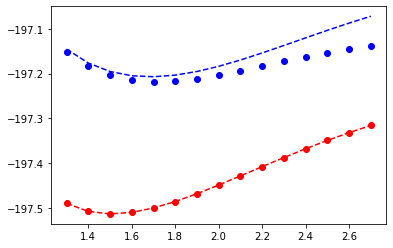

In [74]:
from matplotlib import pyplot as plt
plt.plot(rs, Psi4_g, 'ro')
plt.plot(rs, Our_g, 'r--')
plt.plot(rs, Psi4_e, 'bo')
plt.plot(rs, Our_e, 'b--')
plt.show()

\begin{align}
    \langle s | \langle \Phi_0 | \hat{H} | \Phi_0 \rangle | t \rangle &= 
    E_{RHF} + \sqrt{t} \left(\omega - i \frac{\gamma}{2} \right)\delta_{st} \\
    &+ \delta_{st}  \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ii}\mu^{\xi}_{jj} \\
    &- \frac{1}{2}\delta_{st} \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij}\mu^{\xi}_{ji} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \sum_i^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ii} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii} \\
    &+ \delta_{st} d_c \\
    &+\sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle ( \delta_{s,t+1} + \delta_{s+1,t} ) \\
    &-\sqrt{\frac{\omega}{2}} \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii}( \delta_{s,t+1} + \delta_{s+1,t} )
\end{align}

In [19]:


# elements corresponding to <s|<\Phi_i^a| H | \Phi_j^b|t>
for i in range(0, ndocc):
    for a in range(0, nvirt):
        for s in range(0,2):
            ias = 2*(i*nvirt + a) + s
            #print(ias)
            #print("i,a,s,ias:",i,a,s,ias)
            
            for j in range(0, ndocc):
                for b in range(0, nvirt):
                    for t in range(0,2):
                        jbt = 2*(j*nvirt + b) + t
                        #print(jbt)
                        #HCIS[ias, jbt] = 
                    

NameError: name 'ndocc' is not defined

In [20]:
# RHF Wavefunction dict from the original RHF wavefunction object 'wfn'
rhf_wfn_dict = psi4.core.Wavefunction.to_file(wfn)

# Uncomment if you want to compare the original RHF orbitals to the 
# CQED-RHF orbitals that are stored in the numpy array 'C'?
#print(np.isclose(rhf_wfn_dict['matrix']['Ca'], C))
#print(np.isclose(rhf_wfn_dict['matrix']['Cb'], C))


# Copy CQED-RHF orbitals to 'rhf_wfn_dict'
rhf_wfn_dict['matrix']['Ca'] -= C
rhf_wfn_dict['matrix']['Cb'] -= C

# Now create a new wavefunction object that has the CQED-RHF orbitals 'cqedrhf_wfn'
cqedrhf_wfn = psi4.core.Wavefunction.from_file(rhf_wfn_dict) 

# Confirm you have copied the CQED-RHF orbitals properly 
# by again getting a dic of the wavefunction and comparing
# the orbitals to the original numpy array 'C' that resulted
# from the CQED-RHF iterations
cqedrhf_wfn_dict = psi4.core.Wavefunction.to_file(cqedrhf_wfn)
print(cqedrhf_wfn_dict['matrix']['Ca'])
print(cqedrhf_wfn_dict['matrix']['Cb'])
#assert np.allclose(cqedrhf_wfn_dict['matrix']['Ca'], C, 1e-6)
#assert np.allclose(cqedrhf_wfn_dict['matrix']['Cb'], C, 1e-6)


NameError: name 'wfn' is not defined

In [21]:
psi4.set_options({
    'CUBEPROP_TASKS': ['ORBITALS'],
    'CUBEPROP_ORBITALS': [1,2,3,4,5,6,7,8,9,10],
})
psi4.cubeprop(cqedrhf_wfn)

NameError: name 'cqedrhf_wfn' is not defined

In [22]:
# this will plot the cqed-rhf orbitals
import fortecubeview
fortecubeview.plot()

ModuleNotFoundError: No module named 'fortecubeview'

In [23]:
# this will plot the original rhf orbitals
psi4.cubeprop(wfn)

NameError: name 'wfn' is not defined

In [ ]:
fortecubeview.plot()